<a href="https://colab.research.google.com/github/flavio-mota/si-rna-ag-2025/blob/main/SOM/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Atividade Prática: Mapas Auto-Organizáveis (Self-Organizing Maps - SOM)

Este notebook demonstra como um SOM aprende a agrupar dados **sem rótulos**.

Você verá:
- A U-Matrix final (mapa de distâncias entre neurônios)
- Uma **animação** mostrando a evolução do mapa durante o aprendizado
- Um **GIF** baixável com a evolução do SOM


In [1]:
!pip install minisom matplotlib scikit-learn imageio tqdm --quiet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from minisom import MiniSom
from tqdm.notebook import tqdm
from IPython.display import clear_output, Image, display
import imageio, os

  Preparing metadata (setup.py) ... done


## 📊 Etapa 1 – Carregamento e normalização dos dados
Usaremos o dataset **Iris** para demonstrar o funcionamento do SOM.

In [2]:
data = load_iris()
X = data.data
y = data.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Formato dos dados:", X_scaled.shape)

Formato dos dados: (150, 4)


## ⚙️ Etapa 2 – Criação e inicialização do SOM

In [3]:
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)
print("Pesos iniciais prontos!")

Pesos iniciais prontos!


## 🧩 Etapa 3 – Treinamento completo e visualização da U-Matrix

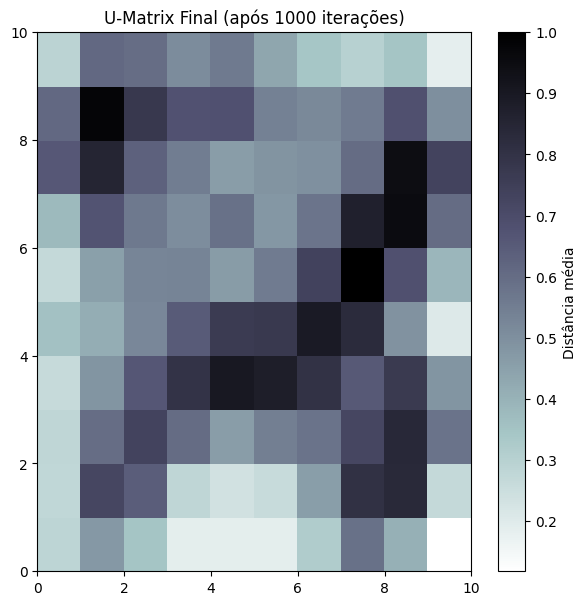

In [4]:
som.train_random(X_scaled, 1000)
plt.figure(figsize=(7,7))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.title("U-Matrix Final (após 1000 iterações)")
plt.colorbar(label='Distância média')
plt.show()

## 🎥 Etapa 4 – Animação da evolução do mapa e geração de GIF

Gerando quadros para o GIF...


  0%|          | 0/1000 [00:00<?, ?it/s]

/tmp/ipython-input-804922824.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(os.path.join(frames_dir, file)))


GIF gerado: evolucao_SOM.gif


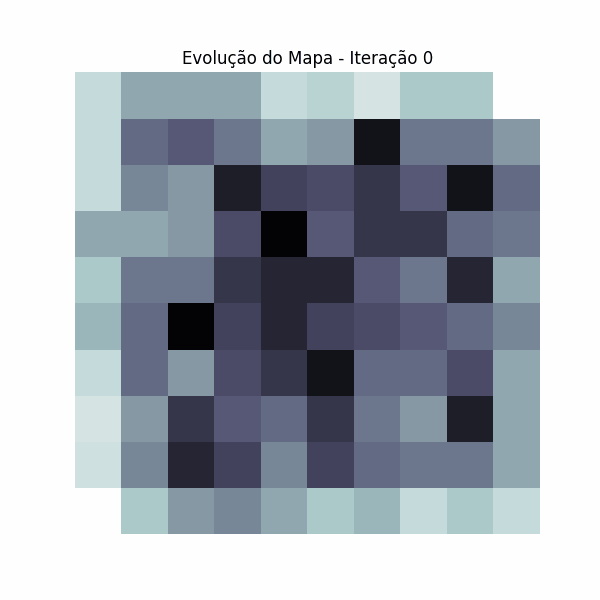

In [5]:
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)

num_iterations = 1000
steps_to_plot = 25
interval = num_iterations // steps_to_plot
frames_dir = "som_frames"
os.makedirs(frames_dir, exist_ok=True)

print("Gerando quadros para o GIF...")
for i in tqdm(range(num_iterations)):
    som.update(X_scaled[i % len(X_scaled)], som.winner(X_scaled[i % len(X_scaled)]), i, num_iterations)
    if i % interval == 0:
        plt.figure(figsize=(6,6))
        plt.pcolor(som.distance_map().T, cmap='bone_r')
        plt.title(f"Evolução do Mapa - Iteração {i}")
        plt.axis('off')
        frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
        plt.savefig(frame_path)
        plt.close()

frames = []
for file in sorted(os.listdir(frames_dir)):
    if file.endswith('.png'):
        frames.append(imageio.imread(os.path.join(frames_dir, file)))

imageio.mimsave('evolucao_SOM.gif', frames, duration=0.3, loop=0)
print('GIF gerado: evolucao_SOM.gif')
display(Image(filename='evolucao_SOM.gif'))

## 🧭 Etapa 5 – Visualização com classes reais

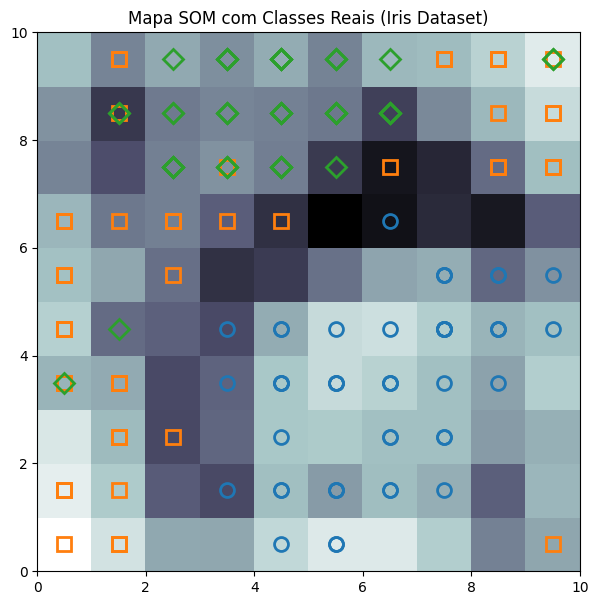

In [6]:
plt.figure(figsize=(7,7))
plt.pcolor(som.distance_map().T, cmap='bone_r')
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[y[i]], markerfacecolor='None', markeredgecolor=colors[y[i]], markersize=10, markeredgewidth=2)

plt.title('Mapa SOM com Classes Reais (Iris Dataset)')
plt.show()

## ⚗️ Etapa 6 – Experimentos interativos (alteração de parâmetros)

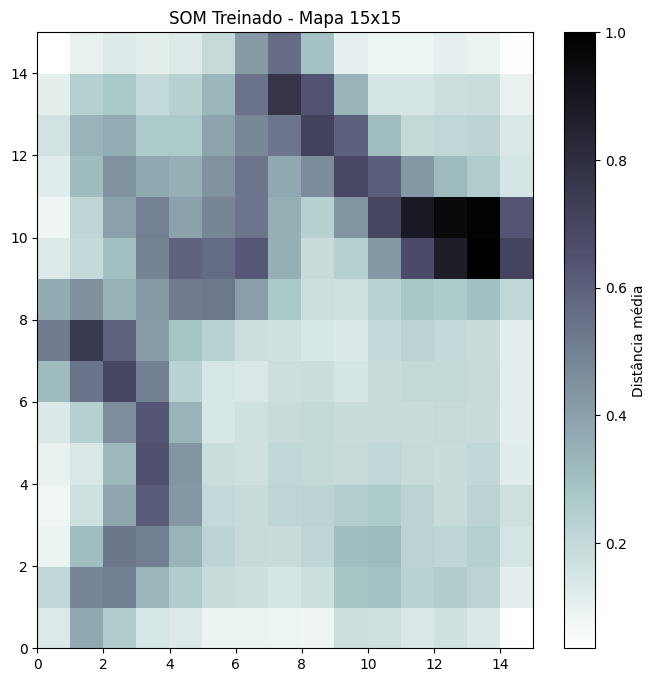

In [7]:
map_size = 15
sigma = 2.0
learning_rate = 0.3
iterations = 2000

som = MiniSom(x=map_size, y=map_size, input_len=X_scaled.shape[1], sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, iterations)

plt.figure(figsize=(8,8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distância média')
plt.title(f'SOM Treinado - Mapa {map_size}x{map_size}')
plt.show()

## ✅ Conclusão
O SOM aprende de forma **competitiva**, ajustando os pesos dos neurônios para representar padrões dos dados.

A **U-Matrix** mostra as fronteiras entre grupos, revelando a estrutura dos dados sem rótulos.

### 🧩 Desafio extra
Tente repetir o experimento com outro dataset, como o **Wine** (`from sklearn.datasets import load_wine`).